<a href="https://colab.research.google.com/github/knightsroundtable/data_analytics_profile/blob/main/1_8_3_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survivors Project

# Introductory Course 1.8.3 Activity



### Activity Goals

You will learn how to explore a dataset, run through a notebook to see visualizations, and walk through a sample data project from start to finish.

*Estimated Time: 60 minutes*

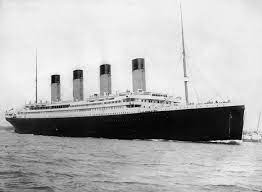

---



---



---



## What is a Jupyter notebook?
A Jupyter notebook is an environemt for running code that allows us to see the output of our code as well as add text throughout the process. It is one of the most common platforms data scientists and analysts use for  their projects. [insert link with more info here] 

This is a Google version of a Jupyter notebook that allows you to run the code through the internet instead of locally on your computer.

For this project, you will mostly be editing cells and running them, note completing the actual code.

In [1]:
#A notebook is made up of cells. This is a code cell.

This is a text cell. You can double click on me to edit.

In [2]:
#To run this cell, either press the play button on the left of the cell, or press shift+enter
print("Hello World")

Hello World


---

## The Data 
Now we will explore the Titanic dataset and make a prediction about the survivors.

In this notebook, you'll be working with the same data from the previous lesson and making a predictive model using python. The Titanic dataset has information about the passengers and whether or not they survived the sinking of the Titanic.

---

## Context 
You have been practicing using Excel tools to analyze data. Now you will get to apply those skills to python and get a glimpse of what you'll be doing when you continue with data projects.

---


## Obtain
First, we need to import the libraries we will be using in this notebook.

In [3]:
#Import all the libraries we will be using in this notebook.

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data
After importing libraries, we will to upload the data we are going to use into a dataframe. This will look like the data you worked with in Excel in the previous lesson.

**Note: The values that were blank in Excel show up as NaN (null) in the table.**

In [4]:
#The total data is split into a training and test set. Training is used to "train" the model, and the test set 
#is used to test the accuracy of the model. We load them both here from the Github repository.
titanic_train = "https://raw.githubusercontent.com/HackerUSA-CE/intro-project/main/data/train.csv"
titanic_test = "https://raw.githubusercontent.com/HackerUSA-CE/intro-project/main/data/test.csv"

#We assign the data to a name so we can refer to it later.
train = pd.read_csv(titanic_train)
test = pd.read_csv(titanic_test)

#This line will show us the first 5 rows of the training data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## Scrub
Data scrubbing, or data cleaning 🧽, is how we get the data into a format suitable for modeling or creating visualizations. For example, sometimes data is collected with a lot of missing values or it contains words when we need a numeric measurement. In the code cell below, we are filling the `Age` column with random values that are close to the mean Age.

In [5]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in Age column with random values generated
    age = dataset["Age"].copy()
    age[np.isnan(age)] = rand
    dataset["Age"] = age
    dataset["Age"] = train["Age"].astype(int)

#Fill in NaN with most common embarked values
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


The code below changes the values from "S", "C", "Q" to numeric values and the `sex` column values to integers.

In [6]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,0


## Explore



<b>Question 1:</b> Based on your preliminary exploration, what potential patterns do you see in this data set? 

<b>Answer: </b> YOUR ANSWER HERE


We will be looking at the survivors and coming up with a prediction based on the other features given to us in the dataset. Based on the visualizations below, we can see that most of the passengers are between 20 and 40 years old, did not have large families, and 

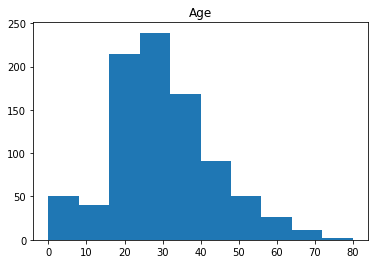

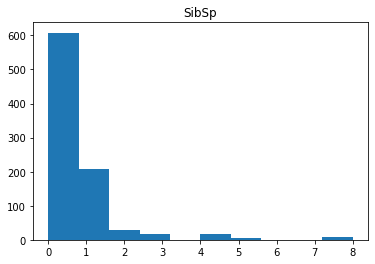

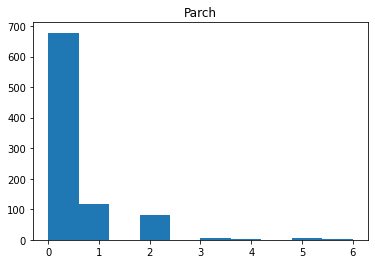

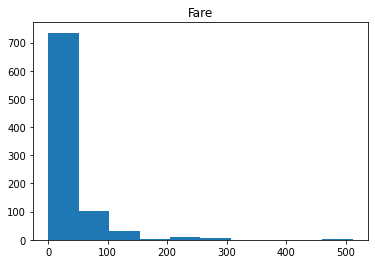

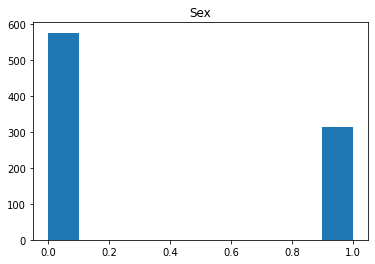

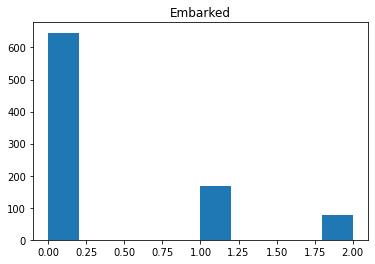

In [8]:
for i in train[['Age','SibSp','Parch','Fare','Sex','Embarked']].columns:
    plt.hist(train[['Age','SibSp','Parch','Fare','Sex','Embarked']][i])
    plt.title(i)
    plt.show()

We only want to select the columns that we want in our model. Based on the exploration, include the column names you think will be able to inform the prediction the best.

In [9]:
#This shows us the averages for the survived (1) and not survived (0).
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,29.996357,21.690346,0.329690,0.553734
1,28.213450,47.991228,0.464912,0.473684


**What do you notice about the above pivot table?**

[Insert answer here]

In [10]:
train = train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
test = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


## Model

Data scientists use models to predict outcomes based on data they currently have. There are many different kinds of models and each one is suitable for a different kind of question or problem.

### Logistic Regression
A logistic regression is a simple model that helps us to predict binary outcomes. For example, a logistic regression model could be used to predict whether a team will win or lose a game or whether someone survived the Titanic sinking or not.

In [12]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

accuracy = round(lr.score(X_train, Y_train) * 100, 2)
accuracy

80.02

In the cell below, you can edit which columns you decide to keep in the training set by referencing the data dictionary from 1.8.2. Make sure to update the test table too.

In [13]:
train = train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
test = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train.head()

#Re-run the model with new train columns.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


## Interpret

What do you notice about the accuracy? Does 80% seem like a good score? 

[Insert answer here]

---
## Closing Remarks
When makeing predictions based on models, we assign an accuracy score but there is usually more to it. Data Scientists will conduct something called **cross validation** to evaluate their models and comment on how reliable they are for decision making. The full-time program will go more into how to create more intricate models and utilize them to make decisions along with the impications that come with that.

Congratulations! You have made it through the Introductory Project!

---
## Additional Resources
- Links to resources/articles
- [Supervised vs Unsupervised](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning)

*Techniques simplified from ones used in this [article.](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

*Pivot table from: [Project](https://www.analyticsvidhya.com/blog/2021/05/titanic-survivors-a-guide-for-your-first-data-science-project/)